<h1>Part 05 : Machine Learning - KMeans algorithm</h1>
<h4>It is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning.</h4>
<h7>K-Means performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. The term 'K' is a number.</h7>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs     # For data creation


<h2>ipywidgets library</h2>
<h7>ipywidgets, also known as jupyter-widgets or simply widgets, are interactive HTML widgets for Jupyter notebooks and the IPython kernel. Notebooks come alive when interactive widgets are used. Users gain control of their data and can visualize changes in the data. Learning becomes an immersive, fun experience.</h7>

In [5]:
from ipywidgets import interact

def cluster_update(cntr = (1, 5), clsr_std = (0, 1.0)):
    x, y_true = make_blobs(
        n_samples=5000,
        n_features=2,
        centers = cntr,
        cluster_std= clsr_std,
        random_state=0
    )
    plt.figure(figsize=(10, 5))
    plt.plot(x[:, 0], x[:, 1], ls = '', marker = '.')
    plt.show()
    return 0

interact(cluster_update)

interactive(children=(IntSlider(value=3, description='cntr', max=5, min=1), FloatSlider(value=0.5, description…

<function __main__.cluster_update(cntr=(1, 5), clsr_std=(0, 1.0))>

<h2>Data creation with 'make_blobs'</h2>
<h7>It provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering.</h7>

In [6]:
x, y_true = make_blobs(
    n_samples = 500,
    n_features = 2, 
    centers = 3,
    cluster_std = 0.2,     # Standard Deviation (Scattering of data in each cluster)
    random_state = 400    
)

In [7]:
x     # Dataset(Features)

array([[ -7.20122973,  -9.73812521],
       [  3.30855892,  -5.39693469],
       [  7.55900166,  -4.20051243],
       [ -7.17422226, -10.06690279],
       [  3.10690833,  -5.37112871],
       [  3.47120093,  -5.35043939],
       [  7.44825658,  -4.34580072],
       [  3.50388793,  -5.59844527],
       [ -6.87618239,  -9.67493017],
       [  7.13122892,  -4.31254128],
       [  7.13470897,  -4.15644468],
       [ -6.95791956, -10.07078162],
       [ -7.11669403,  -9.8390363 ],
       [  3.20962016,  -5.63730378],
       [  3.37175919,  -5.7617817 ],
       [ -6.94389399,  -9.84480313],
       [  3.0988629 ,  -5.52031698],
       [ -7.20396734,  -9.92883837],
       [  6.93677587,  -3.99406685],
       [  6.9922305 ,  -4.3104693 ],
       [  3.18187816,  -5.6404713 ],
       [ -7.23875608,  -9.49353199],
       [  3.28873457,  -5.32695387],
       [  7.43298086,  -4.23826715],
       [  7.29968303,  -4.21254672],
       [ -6.74085476,  -9.88148252],
       [  7.22268477,  -4.56684352],
 

In [8]:
x[:, 0]     # Column 1 (Feature 1) from features data (index : 0)

array([-7.20122973,  3.30855892,  7.55900166, -7.17422226,  3.10690833,
        3.47120093,  7.44825658,  3.50388793, -6.87618239,  7.13122892,
        7.13470897, -6.95791956, -7.11669403,  3.20962016,  3.37175919,
       -6.94389399,  3.0988629 , -7.20396734,  6.93677587,  6.9922305 ,
        3.18187816, -7.23875608,  3.28873457,  7.43298086,  7.29968303,
       -6.74085476,  7.22268477,  7.31588384, -6.69942885,  3.31273193,
        7.13277084,  3.14297215,  3.24174185,  3.26928804,  3.60213314,
        7.1974826 ,  7.01991139, -6.59355066, -7.11580517,  7.43900365,
        7.54876168,  7.17433861, -7.12975347, -6.77679057, -7.11234115,
        7.04870956, -6.95920244, -7.10445933, -6.93702971,  7.2636061 ,
        3.47490675, -6.971375  ,  3.50090669,  3.21351183, -7.01137066,
        2.98021309,  6.93041153,  7.03927497, -6.89574251,  3.68771135,
        7.29623771, -7.005151  ,  3.01504253,  7.50512226,  6.7655164 ,
        7.27931035,  6.80362311,  7.13126869, -6.99122468,  7.29

In [9]:
x[:, 1]     # Column 2 (Feature 2) from features data (index : 1)

array([ -9.73812521,  -5.39693469,  -4.20051243, -10.06690279,
        -5.37112871,  -5.35043939,  -4.34580072,  -5.59844527,
        -9.67493017,  -4.31254128,  -4.15644468, -10.07078162,
        -9.8390363 ,  -5.63730378,  -5.7617817 ,  -9.84480313,
        -5.52031698,  -9.92883837,  -3.99406685,  -4.3104693 ,
        -5.6404713 ,  -9.49353199,  -5.32695387,  -4.23826715,
        -4.21254672,  -9.88148252,  -4.56684352,  -4.25612653,
        -9.51785552,  -5.48653808,  -4.19396451,  -5.35787452,
        -5.24878888,  -5.70341798,  -5.27754079,  -3.94997668,
        -4.2788289 ,  -9.83534105,  -9.88042208,  -4.27250957,
        -4.35606349,  -4.04716139,  -9.92940382,  -9.96978375,
        -9.47568223,  -4.12427965,  -9.59448795,  -9.95370422,
        -9.96871858,  -4.38139363,  -5.48016424,  -9.77112554,
        -5.46472997,  -5.32497546,  -9.96358953,  -5.65045098,
        -4.20663351,  -4.21507188,  -9.85709373,  -5.58763483,
        -4.61795124,  -9.56140508,  -5.26734935,  -3.84

In [10]:
y_true     # output/lables

array([2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2,

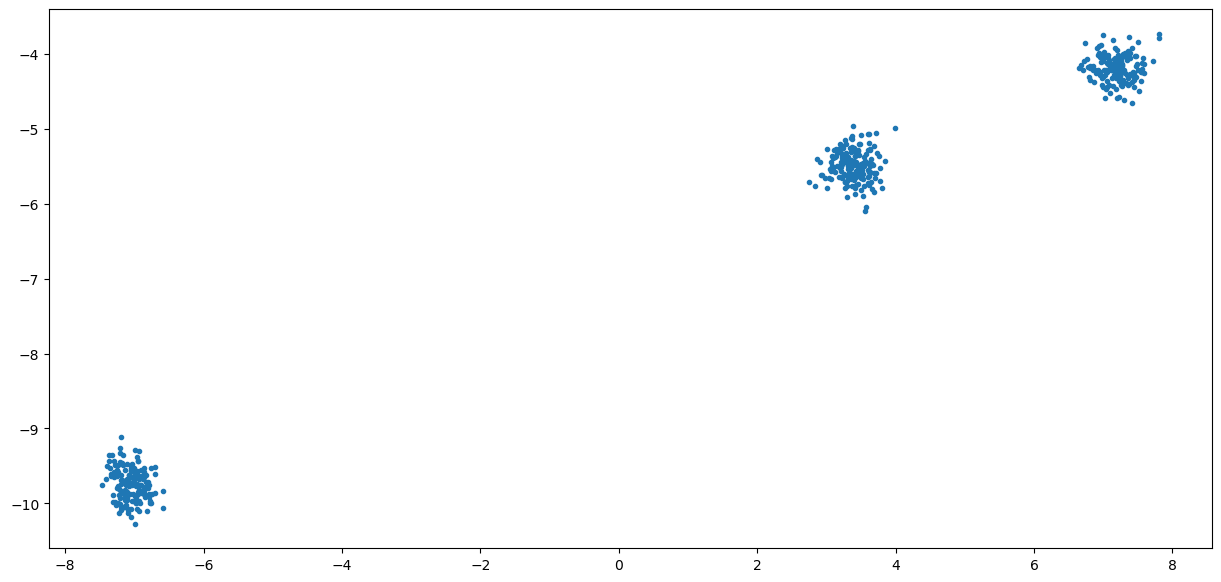

In [11]:
plt.figure(figsize = (15, 7))
plt.plot(x[: , 0], x[: , 1], ls = '',  marker = '.')     # ls : Line Style

<h2>KMeans Model</h2>


In [12]:
from sklearn.cluster import KMeans

kmean_model = KMeans(n_clusters = 3)
kmean_model.fit(x)

KMeans(n_clusters=3)

In [13]:
kmean_model.labels_

array([1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1,

<h2>K-Means: Inertia</h2>
<h7>Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )</h7>

In [14]:
print('KMeans Inertia in this model:', kmean_model.inertia_)

KMeans Inertia in this model: 40.557075474107506


In [15]:
kmean_model.cluster_centers_     # Center of clusters in this kmeans model

array([[ 3.3783179 , -5.48521492],
       [-7.0527082 , -9.74971534],
       [ 7.18207444, -4.18456482]])

<h2>Scatter plot</h2>
<h7>It is a diagram where each value in the data set is represented by a dot. The Matplotlib module has a method for drawing scatter plots, it needs two arrays of the same length, one for the values of the x-axis, and one for the values of the y-axis</h7>

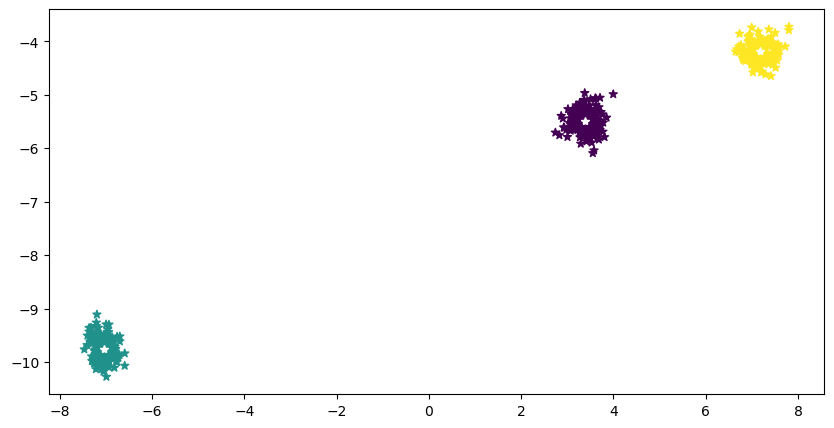

In [16]:
plt.figure(figsize = (10, 5))
# Show Center of Clusters:
plt.plot(kmean_model.cluster_centers_[0, 0], kmean_model.cluster_centers_[0, 1], marker = '*', color = 'white')
plt.plot(kmean_model.cluster_centers_[1, 0], kmean_model.cluster_centers_[1, 1], marker = '*', color = 'white')
plt.plot(kmean_model.cluster_centers_[2, 0], kmean_model.cluster_centers_[2, 1], marker = '*', color = 'white')
# Show Clusters:
plt.scatter(x[:, 0], x[:, 1], marker = '*', c = kmean_model.labels_)     # c : color each cluster as their lables(0,1,2)
# plt.show()     # No need

In [17]:
kmean_model.labels_

array([1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1,

<h2>How find Optimal k?</h2>
<h2>1- Elbow Curve Method</h2>
<h7>The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.</h7>

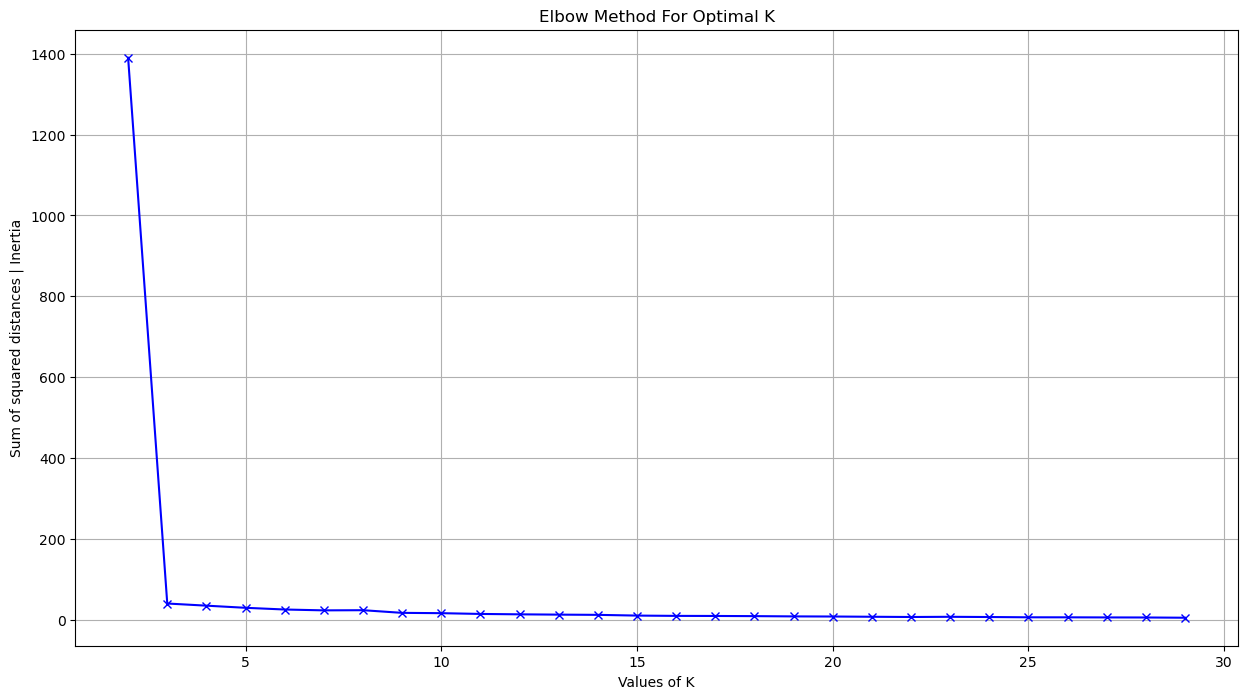

In [18]:
sum_of_squared_distances = []
k = range(2, 30)
for num_clusters in k:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(x)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize = (15, 8))
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K' )
plt.ylabel('Sum of squared distances | Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show()

<h2>2- Silhouette Analysis</h2>
<h7>The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn/sklearn library.</h7>

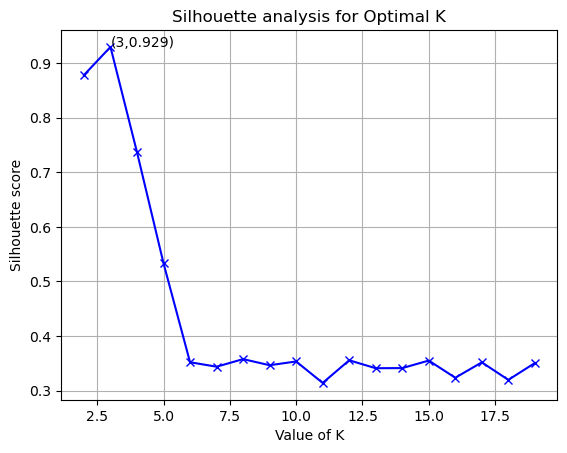

In [19]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 20)
silhouett_avg = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouett_avg.append(silhouette_score(x, cluster_labels))

plt.plot(range_n_clusters, silhouett_avg, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal K')
plt.grid()  

y1 = np.max(silhouett_avg)
x1 = range_n_clusters[np.argmax(silhouett_avg)]
txt = '(' + str(x1) + ',' + str(round(y1, 3)) + ')'

plt.text(x1, y1, txt)
plt.show()

